In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = fetch_openml(data_id=531, as_frame=True, parser="auto")
print(data['DESCR'])

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [18]:
# добавляем target в сами данные
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Содержит информацию о жилье в Бостоне, собранную бюро переписи населения США. Она была получена из архива StatLib и широко использовалась в литературе для оценки алгоритмов.

- CRIM - уровень преступности на душу населения
- ZN - доля земли под жилую застройку,
- INDUS - доля акров, не относящихся к розничной торговле.
- CHAS - фиктивная переменная реки Чарльз (1, если участок ограничивает реку; 0 в противном случае)
- NOX - концентрация оксидов азота
- RM - среднее количество комнат в доме
- AGE - доля занимаемых владельцами единиц, построенных до 1940 г.
- DIS - взвешенное расстояние до пяти бостонских центров занятости
- RAD - индекс доступности радиальных автомобильных дорог
- TAX - полная ставка налога на имущество за 10 000 долларов США.
- PTRATIO - соотношение учеников и учителей по городам
- B - 1000 (Bk - 0,63) ^ 2, где Bk - доля афроамериканцев по городам
- LSTAT - % более населения низкого соц статуса
- MEDV - Средняя стоимость домов в 1000 долларов

## Корреляция

<Axes: xlabel='CRIM', ylabel='MEDV'>

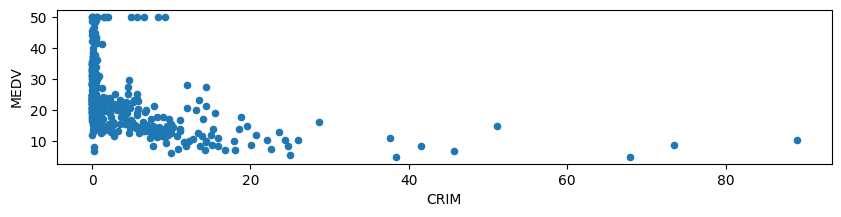

In [28]:
# визуализируем взаимосвязь преступности и цены дома
df.plot(kind='scatter', x='CRIM', y='MEDV', figsize=(10, 2))

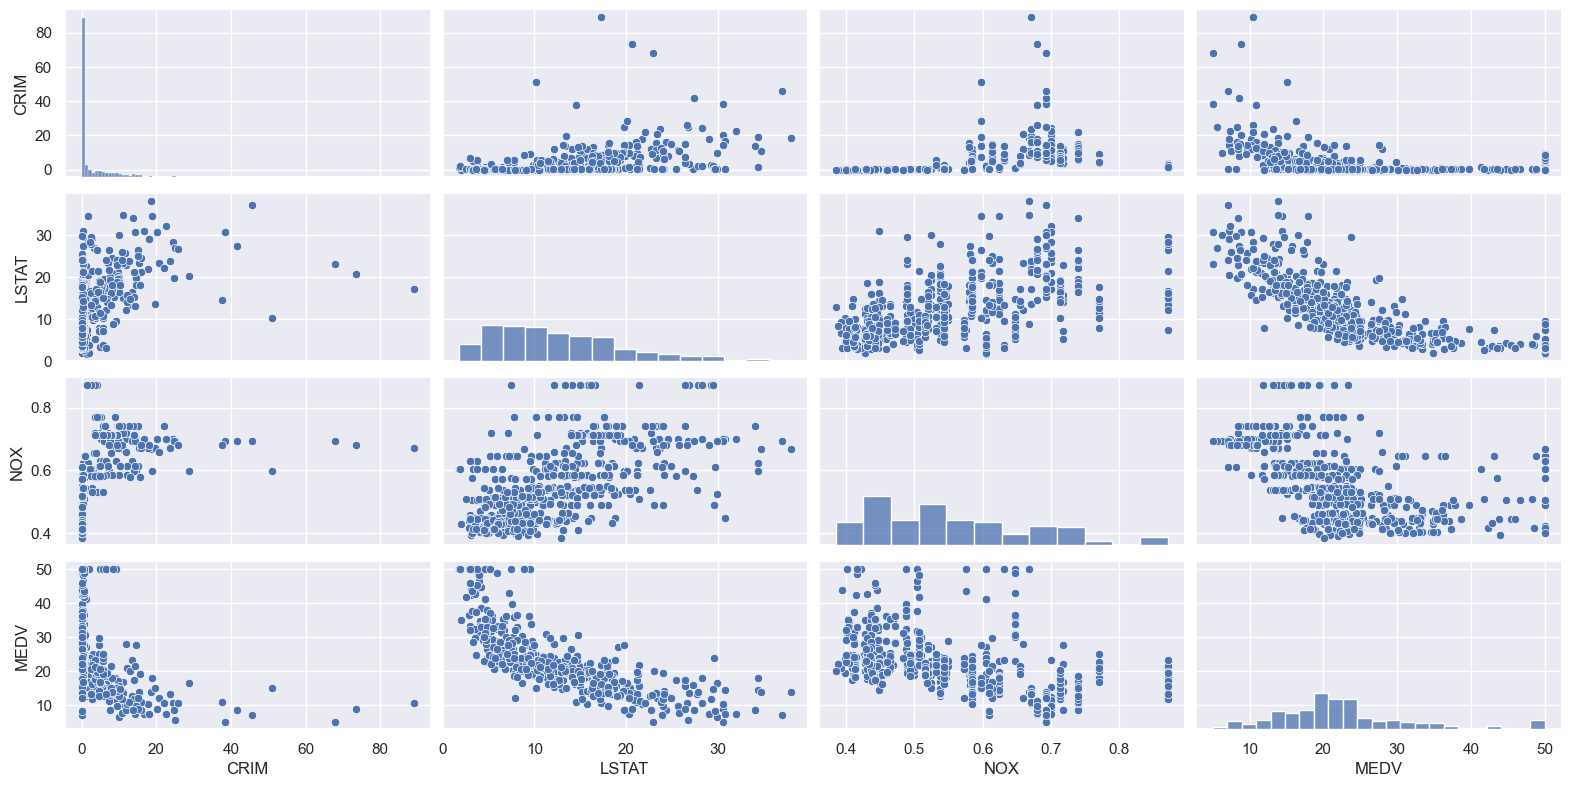

In [43]:
# можем использовать pairplot для изучения взаимосвязи между множеством признаков
sns.pairplot(df[['CRIM', 'LSTAT', 'NOX', 'MEDV']], height=2, aspect=2)
plt.show()

<Axes: xlabel='LSTAT', ylabel='RM'>

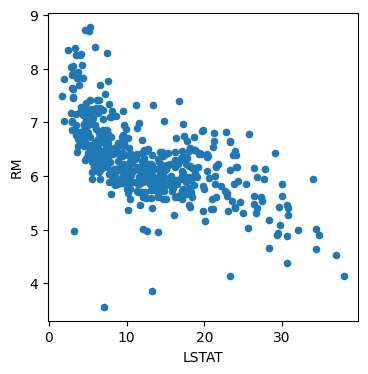

In [38]:
# изучаем взаимосвязь между населением низкого соц. статуса и количеством комнат в доме
df.plot(kind='scatter', x='LSTAT', y='RM', figsize=(4, 4))

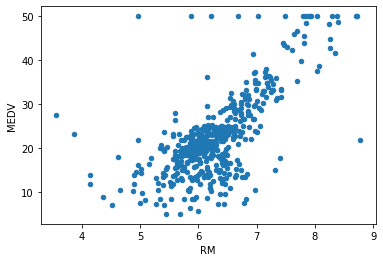

In [ ]:
# изучаем взаимосвязь между ценой и количеством комнат в доме
df.plot(kind='scatter', x='RM', y='MEDV')

In [39]:
# считаем коэф. корреляции Пирсона
df[['RM', 'MEDV']].corr()

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


In [40]:
# считаем коэф. корреляции Спирмана
df[['RM', 'MEDV']].corr(method='spearman')

,RM,MEDV
RM,1.000000,0.633576
MEDV,0.633576,1.000000


In [41]:
# считаем коэф. корреляции Кенделла
df[['RM', 'MEDV']].corr(method='kendall')

,RM,MEDV
RM,1.000000,0.482829
MEDV,0.482829,1.000000


In [ ]:
# можем посчитать коэффициенты корреляции между всеми показателями
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

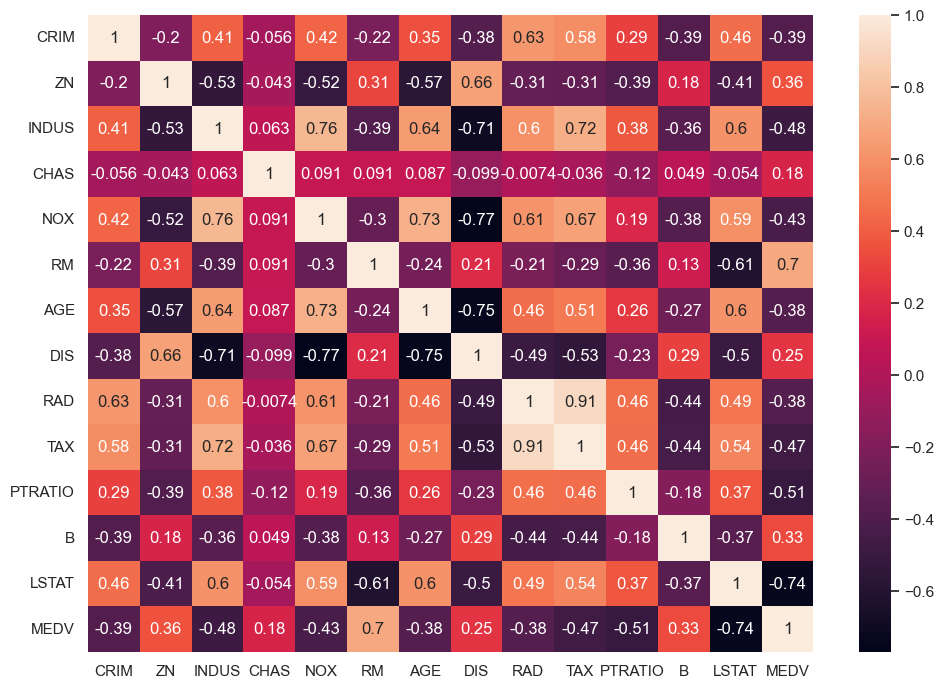

In [42]:
# удобно визуализировать при помощи тепловой карты
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.heatmap(df.corr(), annot=True)

## Регрессия

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [79]:
X = df[['RM']]
y = df['MEDV']


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [81]:
X_train.shape

(354, 1)

In [82]:
y_train.shape

(354,)

In [94]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [95]:
model.coef_

array([9.1181022])

In [86]:
model.intercept_

-34.662307438406785

In [ ]:
# y = 9.11 * x - 34

In [87]:
y_pred = model.predict(X_test)
y_pred

array([23.83943626, 26.95782721, 19.89129801, 20.63898239, 22.7543821 ,
       22.59025626, 19.26214896, 21.63285553, 22.13435115, 20.2924945 ,
       19.59951874, 20.08277815,  6.54239639, 22.16170546, 17.3838199 ,
       28.9820459 , 18.94301538,  9.83403128, 37.14274737, 21.73315465,
       22.23465027, 24.441231  , 17.42941041, 25.45334035, 20.10101436,
       14.82163319, 18.89742487, 26.68428415, 19.68158166, 18.16797669,
       16.143758  , 23.93061728, 32.01837393, 14.22895654, 20.07366005,
       17.39293801, 30.85125685, 18.85183436, 20.62986429, 22.28024078,
       14.48426341, 27.78757451, 38.59252561, 16.34435625, 23.84855436,
       17.42941041, 17.31999319, 23.84855436, 21.56902881, 25.28921451,
       20.12836867, 28.87262867, 21.34107626, 27.16754356, 33.44991598,
       22.89115363, 22.04317013, 27.89699174, 23.5932475 , 16.44465538,
       26.99429962, 31.43481539, 25.07949816, 15.08605815, 25.32568692,
       14.0648307 , 24.34093188, 22.79997261, 25.47157655, 19.82

In [88]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: MEDV, Length: 152, dtype: float64

In [89]:
model.score(X_test, y_test)  # метод возвращает значение коэффициента детерминации

0.4584649934303068

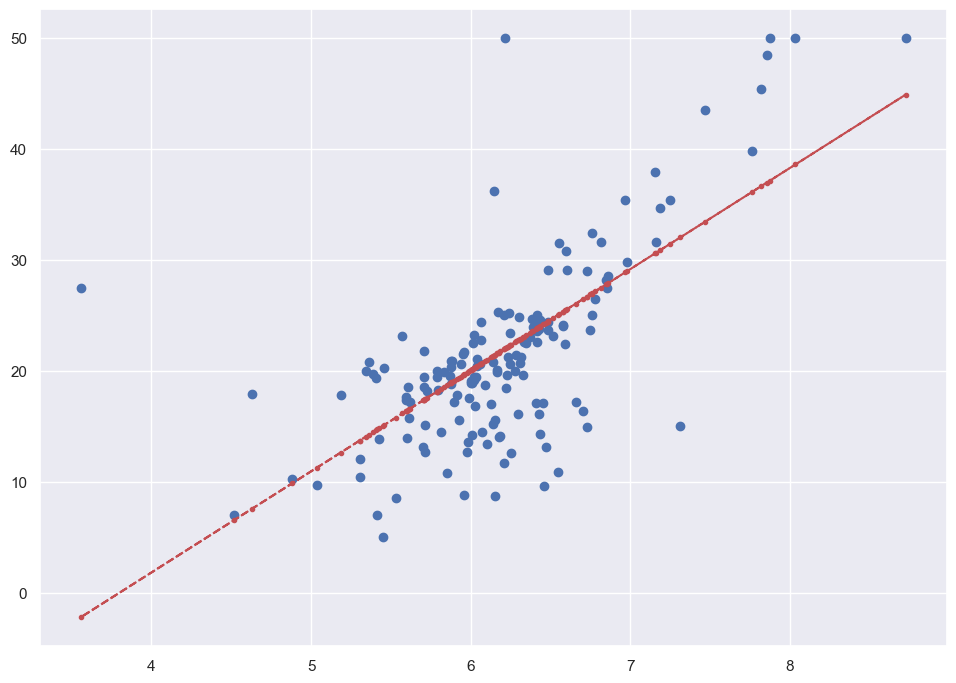

In [117]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r--.')

In [ ]:
# Альтернативный способ из statsmodel

In [98]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [100]:
X_const = sm.add_constant(X_train)  # техническая особенность библиотеки, надо руками добавить константу

In [101]:
X_const

,const,RM
5,1.0,6.430
116,1.0,6.176
45,1.0,5.682
16,1.0,5.935
468,1.0,5.926
...,...,...
106,1.0,5.836
270,1.0,5.856
348,1.0,6.635
435,1.0,6.629


In [102]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     335.4
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           4.28e-53
Time:                        19:44:25   Log-Likelihood:                -1176.1
No. Observations:                 354   AIC:                             2356.
Df Residuals:                     352   BIC:                             2364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6623      3.170    -10.935      0.0

In [103]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const   -34.662307
RM        9.118102
dtype: float64
R2:  0.48788928532759923


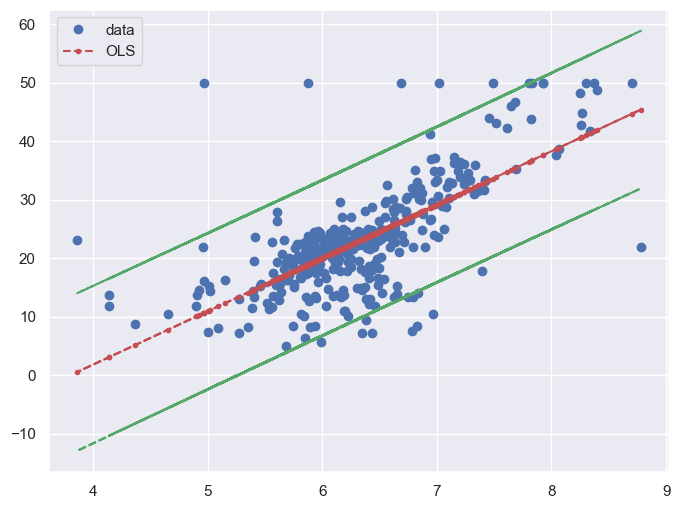

In [123]:
prstd, iv_l, iv_u = wls_prediction_std(results)
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

In [2]:
# посмотрим на остатки
# plt.scatter(X_test, y_test)
# plt.scatter(X_train, y_train)
plt.scatter(X_const.iloc[:, 1], results.resid)

NameError: name 'plt' is not defined

(array([  4.,  18.,  42., 164., 100.,  20.,   1.,   3.,   1.,   1.]),
 array([-23.49462985, -17.21063292, -10.92663598,  -4.64263904,
          1.64135789,   7.92535483,  14.20935177,  20.49334871,
         26.77734564,  33.06134258,  39.34533952]),
 <a list of 10 Patch objects>)

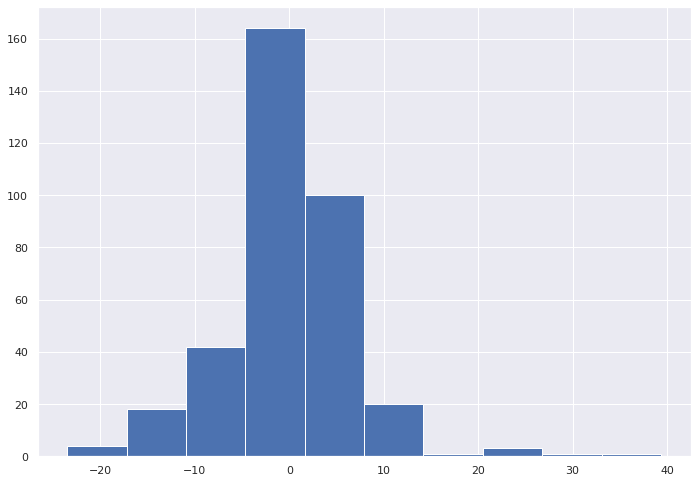

In [ ]:
plt.hist(results.resid)